In [83]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import mlflow
import mlflow.sklearn

# import joblib
import seaborn as sns


In [33]:
df = pd.read_csv("./dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [34]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

<Axes: xlabel='Target', ylabel='Count'>

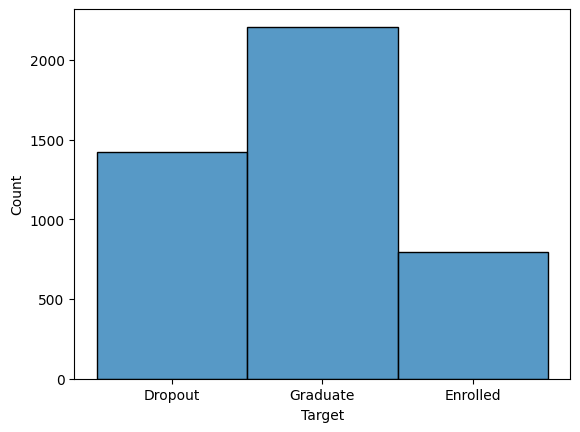

In [35]:
sns.histplot(
    df,
    x="Target"
)

In [36]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [38]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [39]:
X = df.drop(labels=["Target"], axis=1)
y = df.Target # Données cible (à déterminer si part de ces categories)

In [69]:
# data_float = []
# data_cat = [
#     "Marital status",
#     "Application mode",
#     "Application order",
#     "Course",
#     "Daytime/evening attendance",
#     "Previous qualification",
#     "Nacionality",
#     "Mother's qualification",
#     "Father's qualification",
#     "Mother's occupation",
#     "Father's occupation",
#     "Displaced",
#     "Educational special needs",
#     "Debtor",
#     "Tuition fees up to date",
#     "Gender",
#     "Scholarship holder",
#     "International",
#     "Unemployment rate",
#     "Inflation rate",
#     "GDP"
#     ]
# data_num = [
#     "Application order",
#     "Curricular units 1st sem (credited)",
#     "Curricular units 1st sem (enrolled)",
#     "Curricular units 1st sem (evaluations)",
#     "Curricular units 1st sem (approved)",
#     "Curricular units 1st sem (grade)",
#     "Curricular units 1st sem (without evaluations)",
#     "Curricular units 2nd sem (credited)",
#     "Curricular units 2nd sem (enrolled)",
#     "Curricular units 2nd sem (evaluations)",
#     "Curricular units 2nd sem (approved)",
#     "Curricular units 2nd sem (grade)",
#     "Curricular units 2nd sem (without evaluations)",
#     "Age at enrollment"
#     ]
# data_bool = []
# float et bool sont respectivement dans num et cat

# À corriger dans vos listes
data_cat = [
    "Marital status", "Application mode", "Course", 
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", 
    "Mother's occupation", "Father's occupation",
    "Displaced", "Educational special needs", "Debtor", 
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

data_num = [
    "Application order", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP" #
]

scaler = StandardScaler() # Quand std à un on "détruit l'unité" => Les éléments sont comparables entre eux lorsque rammené à un
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # drop = "first" drop la catégorie sans informations (la premiére xD)
# 



Le message indique que dans votre jeu de test (X_test), à la colonne 5 de votre liste data_cat (probablement Previous qualification), le modèle a trouvé des valeurs (codes 6 et 15) qu'il n'avait jamais vues lors du fit sur X_train.

Comme vous utilisez OneHotEncoder, par défaut, il panique (handle_unknown='error') car il ne sait pas dans quelle colonne mettre ces nouvelles catégories.

La Solution : Configurer l'Encoder pour l'ignorer
Pour corriger cela, vous devez modifier l'instanciation de votre OneHotEncoder. Au lieu de s'arrêter, il créera une ligne remplie de zéros pour ces catégories inconnues.

In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, data_num),
        ("cat", encoder, data_cat)
    ]
)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [72]:
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000)),
    ]
)

In [73]:
model = pipeline.fit(X_train, y_train)

In [75]:
score1 = model.score(X_test, y_test)
score1

0.7649717514124293

In [76]:
score2 = model.score(X_train, y_train)
score2

0.8149194687764906

In [77]:
prediction = model.predict(X_test)

In [88]:

mlflow.set_experiment("reussite_academique_classification")

def train_model_custom(model_name, pipeline, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=model_name):
        # Entraînement
        pipeline.fit(X_train, y_train)
        
        # Calcul des métriques
        score = pipeline.score(X_test, y_test)
        
        # Log des paramètres et métriques
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("accuracy", score)
        
        # Sauvegarde du modèle en tant qu'Artefact (exigence de votre projet)
        mlflow.sklearn.log_model(pipeline, "pipeline_model")
        
        # Optionnel : log du fichier joblib physiquement
        # joblib.dump(pipeline, "model_temp.joblib")
        # mlflow.log_artifact("model_temp.joblib")
        
        print(f"Modèle {model_name} enregistré avec un score de {score:.4f}")

In [89]:

train_model_custom("Logistic_Regression_V1", pipeline, X_train, y_train, X_test, y_test)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight='balanced', n_estimators=100))
])
train_model_custom("Random_Forest_Balanced", rf_pipeline, X_train, y_train, X_test, y_test)

2026/02/24 16:40:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/24 16:40:00 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026/02/24 16:40:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Modèle Logistic_Regression_V1 enregistré avec un score de 0.7650


2026/02/24 16:40:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/24 16:40:12 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026/02/24 16:40:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Modèle Random_Forest_Balanced enregistré avec un score de 0.7582


```bash
mlflow ui
```